<a href="https://www.kaggle.com/code/wisemanlessie/basic-image-classification?scriptVersionId=139921056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

170498071/170498071 [==============================] - 6s 0us/step


In [2]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [3]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 118s 165ms/step - loss: 1.6325 - accuracy: 0.4104 - val_loss: 1.2422 - val_accuracy: 0.5754
Epoch 2/10
704/704 [==============================] - 115s 163ms/step - loss: 1.2782 - accuracy: 0.5470 - val_loss: 1.0407 - val_accuracy: 0.6474
Epoch 3/10
704/704 [==============================] - 116s 164ms/step - loss: 1.1390 - accuracy: 0.5978 - val_loss: 0.9636 - val_accuracy: 0.6622
Epoch 4/10
704/704 [==============================] - 117s 166ms/step - loss: 1.0596 - accuracy: 0.6291 - val_loss: 0.9306 - val_accuracy: 0.6726
Epoch 5/10
704/704 [==============================] - 114s 162ms/step - loss: 0.9963 - accuracy: 0.6465 - val_loss: 0.8963 - val_accuracy: 0.6810
Epoch 6/10
704/704 [==============================] - 115s 163ms/step - loss: 0.9419 - accuracy: 0.6646 - val_loss: 0.8949 - val_accuracy: 0.6916
Epoch 7/10
704/704 [==============================] - 115s 164ms/step - loss: 0.8966 - accuracy: 0.6792 - val_loss: 0.8960 -

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.8996
Test accuracy: 0.6850


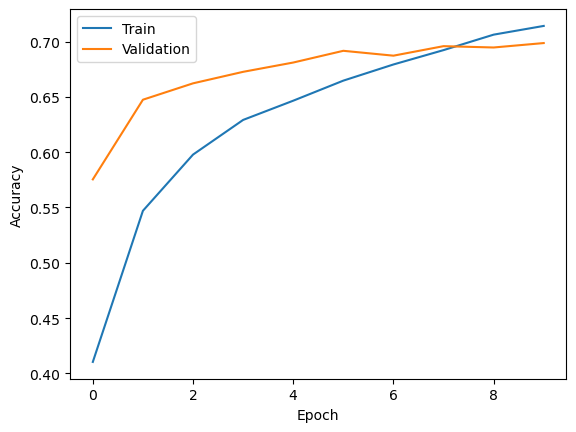

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()